# RRFS 🅱

<style>
  .beta-badge {
    background-color: #f39c12;
    color: white;
    padding: 4px 8px;
    border-radius: 4px;
    font-weight: bold;
  }
</style>

<span class="beta-badge">BETA</span>

The Rapid Refresh Forecast System (RRFS) is _undergoing rapid development_. There are some prototype products and forecasts available on the cloud on AWS. Some files have an index file, others do not.


In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie("2024-01-10", model="rrfs", fxx=1, member="control", domain="conus")

✅ Found ┊ model=rrfs ┊ product=prslev ┊ 2024-Jan-10 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
H.help()

╭─Herbie────────────────────────────────
│ Help for model='rrfs'
│ 
│ Rapid Refresh Forecast System (RRFS) Ensemble
│ {'aws product description': 'https://registry.opendata.aws/noaa-rrfs/'}
│ 
│ Herbie(date, model='rrfs', ...)
│ 
│ fxx : int
│ product : {"prs", "nat", "testbed", "ififip"}
│ member : {"control", int}
│ domain : {"conus", "alaska", "hawaii", "puerto rico", None}
│ 
│ If product="natlev', then domain must be None
│ 
╰───────────────────────────────────────



In [4]:
H.SOURCES

{'aws': 'https://noaa-rrfs-pds.s3.amazonaws.com/rrfs_a/rrfs_a.20240110/00/control/rrfs.t00z.prslev.f001.conus_3km.grib2'}

In [5]:
H.PRODUCTS

{'prslev': '', 'natlev': '', 'testbed': '', 'ififip': ''}

In [6]:
ds = H.xarray("TMP:2 m above ground")
ds

<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2024-01-10
    step                 timedelta64[ns] 01:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2024-01-10T01:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 291.9 291.9 291.9 ... 268.1 268.2 268.2
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rrfs
    product:                 prslev
    description:             Rapid Refresh Forecast System (RRFS) Ensemble
    remote_grib:             https://noaa-rrfs-pds.s3.amazonaws.com/rrfs_a/rr...
    local_grib:              /home/blaylock/data/rrfs/20240110/control/subset...
    searchString:            TMP:2 m above ground

Text(0.0, 1.0, 'RRFS: member=control ')

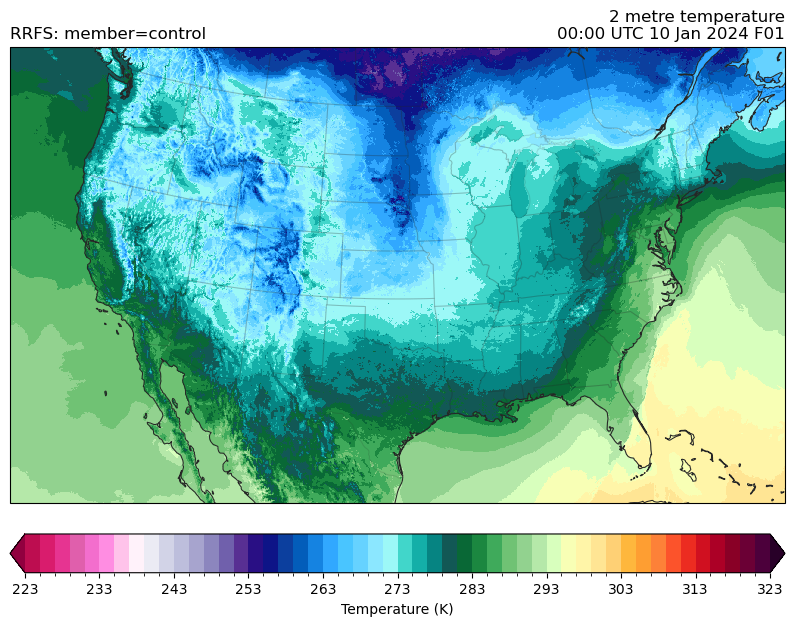

In [7]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(
    f"{ds.t2m.GRIB_name}\n{ds.time.dt.strftime('%H:%M UTC %d %b %Y').item()} F{int(ds.step.dt.total_seconds() / 60 / 60):02d}",
    loc="right",
)
ax.set_title(
    f"{H.model.upper()}: member={H.member} {H.product_description}", loc="left"
)

### Other products

> Reading natlev data into xarray causes my kernel to crash


In [8]:
H = Herbie("2024-01-10", model="rrfs", product="natlev", member="control", domain=None)
H

✅ Found ┊ model=rrfs ┊ product=natlev ┊ 2024-Jan-10 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


▌▌Herbie RRFS model natlev product initialized 2024-Jan-10 00:00 UTC F00 ┊ source=aws

In [9]:
H.inventory("TMP:5 hybrid")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??,search_this
87,88,500393712,510769360.0,500393712-510769360,2024-01-10,2024-01-10,TMP,5 hybrid level,anl,NaN,NaN,:TMP:5 hybrid level:anl:nan


In [10]:
H.download("TMP:5 hybrid")

PosixPath('/home/blaylock/data/rrfs/20240110/control/subset_a3ef48ac__rrfs.t00z.natlev.f000.grib2')

In [11]:
ds = H.xarray("TMP:5 hybrid")
ds

/home/blaylock/GITHUB/Herbie/herbie/core.py:1082: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset>
Dimensions:              (y: 2961, x: 4881)
Coordinates:
    time                 datetime64[ns] 2024-01-10
    step                 timedelta64[ns] 00:00:00
    hybrid               float64 5.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t                    (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rrfs
    product:                 natlev
    description:             Rapid Refresh Forecast System (RRFS) Ensemble
    remote_grib:             https://noaa-rrfs-pds.s3.amazonaws.com/rrfs_a/rr...
    local_grib:              /home/blaylock/data/rrfs/20240110/control/subset...
    searchString:            TMP:5 hybrid

In [12]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(
    f"{ds.t.GRIB_name}\n{ds.time.dt.strftime('%H:%M UTC %d %b %Y').item()} F{int(ds.step.dt.total_seconds() / 60 / 60):02d}",
    loc="right",
)
ax.set_title(
    f"{H.model.upper()}: member={H.member} {H.product_description}", loc="left"
)

: 